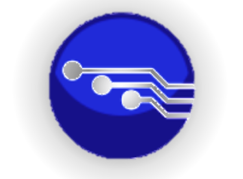

# <center> Unsupervised Learning Methods </center>
## <center> Problem Set III </center>
### <center> PCA and KPCA </center>

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

 # PCA

### 2.9 PCA Implementation
Implement the following `PCA` class:
* `Fit` - Given $\boldsymbol{X}\in\mathbb{R}^{D\times N}$, obtains the parameters for the `Encode` and `Decode` methods.
* `Encode` - Apply (out of sample) encoding.
* `Decode` - Apply (out of sample) decoding.  

**Notes:**
* Use `scipy.sparse.linalg.svds` for efficient decomposition.
* The order of the singular values obtained by `svds` is not guaranteed.

In [2]:
from scipy.sparse.linalg import svds

class PCA:
    def __init__(self, d):
        self.d = d
        
    def Fit(self, mX):
        '''
        Learns model's parameters
        Args:
            mX - Input training data, mX.shape = (D, N)
        Output:
            self
        '''
        ####################################################
        ##--Your code here...
        pass
        #################################################### 
        return self
    
    def Encode(self, mX):
        '''
        Apply (out of sample) encoding
        Args:
            mX - Input data,                                  mX.shape = (D, N)
        Output:
            mZ - Low-dimensional representation (embeddings), mZ.shape = (d, N)
        '''
        ####################################################
        ##--Your code here...
        pass
        ####################################################
    
    def Decode(self, mZ):
        '''
        Apply (out of sample) decoding
        Args:
            mZ    - Low-dimensional representation (embeddings), mZ.shape    = (d, N)
        Output:
            mHatX - Reconstructed data,                          mHatX.shape = (D, N)
        '''
        ####################################################
        ##--Your code here...
        pass
        ####################################################
        

#### Test your implementation

In [3]:
N = 1000
D = 2
d = 1

μ =  [1, 2]

Σ = [[5, 2],
     [2, 1]]

mX    = np.random.multivariate_normal(μ, Σ, N).T
oPCA  = PCA(d).Fit   (mX)
mZ    = oPCA  .Encode(mX)
mHatX = oPCA  .Decode(mZ)

plt.figure ()
plt.scatter(*mX   , s=25, c='b', edgecolor='k', alpha=.5)
plt.scatter(*mHatX, s=25, c='g', edgecolor='k', alpha=.5)
plt.axis   ('equal')
plt.grid   ()
plt.show   ()

TypeError: scatter() argument after * must be an iterable, not NoneType

---
### 2.10
For each dataset in `[load_iris, load_wine, load_breast_cancer, load_digits]`:
1. Read about the input data:
    * How many features are in the sample? $D=?$
    * How many sample? $N=?$
    * Do all features have the same unit?
2. If the features do not have the same unit, consider normalizing the input data.  
that is, remove the sample mean and divide by the sample std:
$$\boldsymbol{x}_{i}\left[k\right]\leftarrow\frac{\boldsymbol{x}_{i}\left[k\right]-\boldsymbol{\mu}_{x}\left[k\right]}{\boldsymbol{\sigma}_{x}\left[k\right]}$$
where $\boldsymbol{\sigma}_{x}\left[k\right]$ is the standard deviation of the $k$th feature.
3. Apply PCA from $D$ to $d=2$ and obtained the low-dimensional represent $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$.
4. Make a scatter plot of $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$ and color the data-points according to `vY`.

You may use the pattern below:

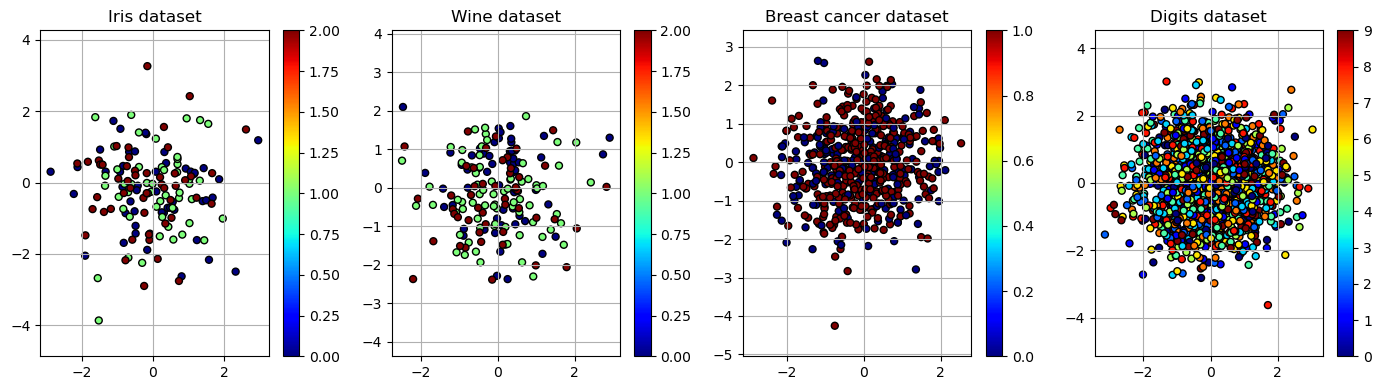

In [10]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits

lLoad  = [load_iris, load_wine, load_breast_cancer, load_digits]
lName  = ['Iris',    'Wine',    'Breast cancer',    'Digits'   ]
L      = len(lLoad)

fig, _ = plt.subplots(1, L, figsize=(14, 4))
for ii in range(L):
    mX, vY = lLoad[ii](return_X_y=True)
    mX     = mX.T

    ####################################################
    ##--Your code here...
    mZ = np.random.randn(2, mX.shape[1]) #-- remove this line
    ####################################################
    
    #-- Plot:
    ax = fig.axes[ii]
    sc = ax.scatter(*mZ, s=25, c=vY, edgecolor='k', cmap='jet')
    ax.set_title   (lName[ii] + ' dataset')
    ax.axis        ('equal')
    ax.grid        ()
    plt.colorbar   (sc, ax=ax)
    
plt.tight_layout()
plt.show        ()

---
### Image denoising
#### Load the `NoisyMNIST.mat` data

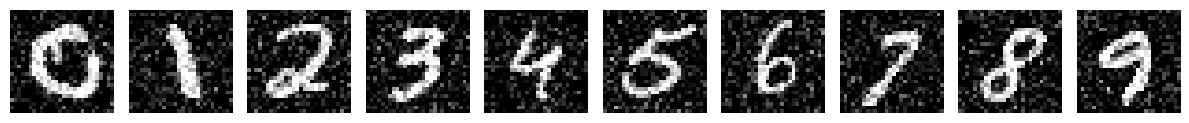

((784, 5000), (5000,))

In [3]:
from scipy.io import loadmat

dMNIST = loadmat('NoisyMNIST.mat')
mX     = dMNIST['mX']
vY     = dMNIST['vY'].squeeze()

vIdx = [np.where(vY == ii)[0][0] for ii in range(10)]

_, vAxes = plt.subplots(1, 10, figsize=(12, 4))
for ii, ax in enumerate(vAxes):
    idx = vIdx[ii]
    mI  = np.reshape(mX[:,idx], (28, 28))
    mI  = np.clip   (mI, 0, 1)

    ax.imshow(mI, cmap='gray')
    ax.axis  ('off')
    
plt.tight_layout()
plt.show        ()
         
mX.shape, vY.shape

The goal here is to use PCA in order to apply (a simple) image denoising
### 2.11
* Plot the spectrum, i.e. the eigenvalues of the covariance matrix.
* Use the plot to set some $d<D$ ($d$ should be set after the "elbow").
* Apply PCA from $D$ to $d$ and back to $D$ (encode-decode).
* Plot the reconstructed data.
* Play with different values of $d$.  
Explain the trade-off between setting small values of $d$ and large values of $d$.

In [4]:
####################################################
##--Your code here...
####################################################

### 2.12
Use the labels `vY` to improve your results (that is, cleaner images).  
(Be creative...)

In [5]:
####################################################
##--Your code here...
####################################################

---
# KPCA
### 3.9 KPCA Implementation
Implement the following `KPCA` class:
* `Fit` - Given $\boldsymbol{X}\in\mathbb{R}^{D\times N}$, obtains the parameters for the `Encode` method.
* `Encode` - Apply (out of sample) encoding.

**Notes:**
* `k` is the kernel function $k:\mathbb{R}^{D}\times\mathbb{R}^{D}\to\mathbb{R}$.
* `k` should support multiple inputs (avoid for loops), namely:
```python
def k(mX1, mX2)
    '''
    Computes the kernel function between two sets of vectors.
    Args:
        mX1 -                       mX1.shape = (D, N1)
        mX2 -                       mX2.shape = (D, N2)
    Output:
        mKx - Output kernel matrix, mKx.shape = (N1, N2)
    '''
```
* Use `scipy.sparse.linalg.eigsh` for efficient decomposition of a real symmetric square matrix.
* Avoid matrix multiplication if not needed (hint: $\tilde{\boldsymbol{X}}=\boldsymbol{X}\boldsymbol{J}$ is slow and inefficient).

In [13]:
from scipy.sparse.linalg import eigsh

class KPCA:
    def __init__(self, d, k):
        self.d = d
        self.k = k
        
    def Fit(self, mX):
        '''
        Learns model's parameters
        Args:
            mX - Input training data, mX.shape = (D, N)
        Output:
            self
        '''
        ####################################################
        ##--Your code here...
        pass
        #################################################### 
        
        return self
    
    def Encode(self, mXstar):
        '''
        Apply (out of sample) encoding
        Args:
            mXstar - Input data,                                  mX.shape = (D, Nstar)
        Output:
            mZ     - Low-dimensional representation (embeddings), mZ.shape = (d, Nstar)
        '''
        ####################################################
        ##--Your code here...
        pass
        #################################################### 
        

---
### 3.10
For each dataset in `[load_iris, load_wine, load_breast_cancer, load_digits]`:
1. If needed, apply normalization (as in 2.10).
2. Apply KPCA from $D$ to $2$ and obtained the low-dimensional represent $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$ using the following kernels:
    * $k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}$, make sure the results match the standard PCA! (and explain why this is the case?)
    * $k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\left(1+\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}\right)^{p}$, set $p$ yourself
    * $k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\exp\left(-\frac{\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}}{2\sigma^{2}}\right)$, set $\sigma$ yourself.  
    A reasonable value should be around $\sigma\approx\textrm{median}\left\{ \left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}\right\} $
4. Make a scatter plot of $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$ and color the data-points according to `vY`.

In [6]:
####################################################
##--Your code here...
####################################################

---
### Bonus (5%)
* Consider the following s-curve data (`mX`).
* `vC` is the color along the main axis of the s-curve.

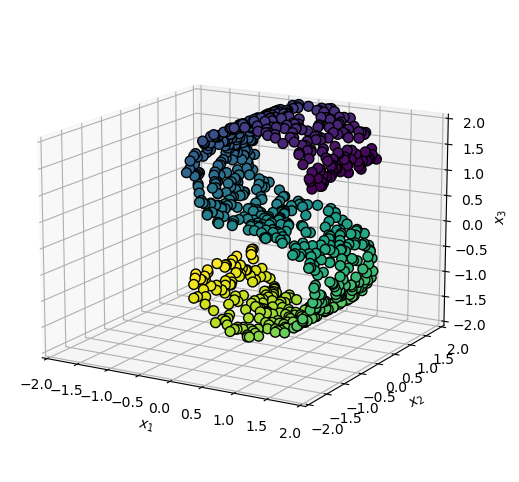

(3, 750)

In [15]:
from sklearn.datasets     import make_s_curve
from mpl_toolkits.mplot3d import Axes3D 

N      = 750
mX, vC = make_s_curve(N)
mX     = mX.T

fig = plt.figure(figsize=(7, 6))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter   (*mX, s=50, c=vC, edgecolor='k', alpha=1)
ax.set_xlim  ([-2, 2])
ax.set_ylim  ([-2, 2])
ax.set_zlim  ([-2, 2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.view_init (elev=15, azim=300)

plt.show()

mX.shape

* Let $\boldsymbol{D}_{x}\in\mathbb{R}^{N\times N}$ (`mDx`) be the geodesic distance between each two points:
$$\boldsymbol{D}_{x}\left[i,j\right]=d_{g}\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)$$
where $d_g$ is the geodesic distance.

Run the cell below (several times) to get some intuition:

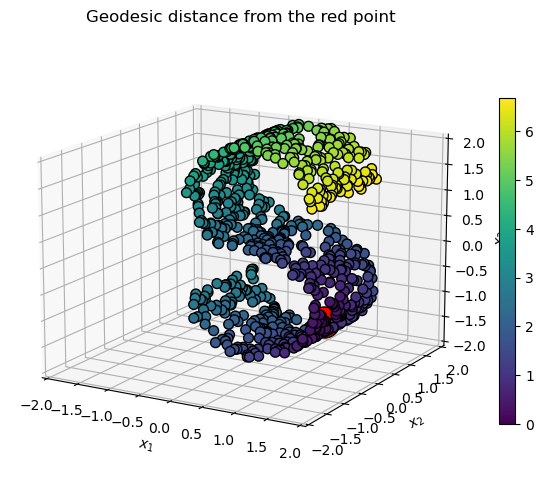

(750, 750)

In [26]:
from scipy.spatial.distance import squareform, pdist

mDx = squareform(pdist(np.c_[vC, mX[1,:]]))
idx = np.random.randint(mX.shape[1])

fig = plt.figure(figsize=(7, 6))
ax  = fig.add_subplot(111, projection='3d')
sc  = ax.scatter(*mX,        s=50,  c=mDx[idx,:], edgecolor='k', alpha=1)
ax.scatter      (*mX[:,idx], s=500, c='r',        edgecolor='k', alpha=1)
ax.set_xlim     ([-2, 2])
ax.set_ylim     ([-2, 2])
ax.set_zlim     ([-2, 2])
ax.set_xlabel   ('$x_1$')
ax.set_ylabel   ('$x_2$')
ax.set_zlabel   ('$x_3$')
ax.set_title    ('Geodesic distance from the red point')
ax.view_init    (elev=15, azim=300)
plt.colorbar    (sc, ax=ax, fraction=.03)
plt.show        ()

mDx.shape

### 3.11
* Apply KPCA with the following kernel:
$$k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\exp\left(-\frac{\left(\boldsymbol{D}_{x}\left[i,j\right]\right)^{2}}{2\cdot 20^{2}}\right)$$
* Plot $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$, the low-dimensional representation.  
    * Use `vC` to color the data points.
    * Use `axis('equal')`
* If done correctly, you should obtain a flatten (but not collapsed) version of the s-curve.
* Compare this result to the standard PCA.
* Try to explain what is the "magic" in this special kernel.


**Note:** Since this is a precomputed kernel, you will not be able to use the `KPCA` class.